In [65]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
DATA_DIR = os.path.join('..', 'data')

In [41]:
os.listdir(DATA_DIR)

['train_df.pkl', 'sample_submission.csv', 'test_df.pkl']

In [42]:
train = pd.read_pickle(os.path.join(DATA_DIR, 'train_df.pkl'))

In [44]:
train['accepted_product_empty'] = train['accepted_product'] == ''
train['rejected_product_empty'] = train['rejected_product'] == ''

In [78]:
train['bin_target'] = train['target'] == 2
train['bin_target'] = train.apply(lambda x: 1 if x['bin_target'] else 0, axis=1)

In [91]:
train['accepted_function'].nunique()

158

In [92]:
train['rejected_function'].nunique()

157

In [95]:
len(train) - len(train[train.target == 1])

3958

(array([ 1008.,     0.,     0.,     0.,     0., 11557.,     0.,     0.,
            0.,  2950.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

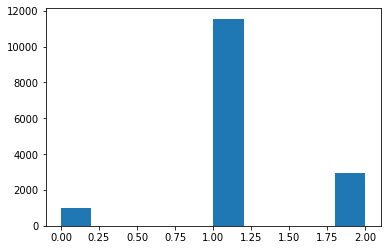

In [25]:
plt.hist(train.target)

(array([  75.,    0.,    0.,    0.,    0., 9525.,    0.,    0.,    0.,
        2276.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

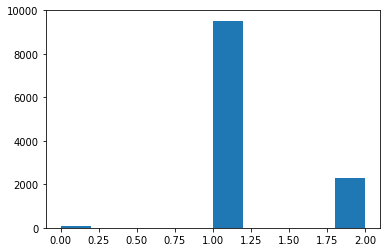

In [33]:
plt.hist(train[train['rejected_product']==''].target)

In [29]:
train['accepted_product'] == ''

0         True
1         True
2         True
3         True
4        False
         ...  
15510     True
15511     True
15512     True
15513     True
15514    False
Name: accepted_product, Length: 15515, dtype: bool

In [82]:
train.groupby('accepted_product_empty').sum()

,target,rejected_product_empty,bin_target
accepted_product_empty,,,
False,3871,469.0,753
True,13586,11407.0,2197


In [84]:
train.groupby('rejected_product_empty').sum()

,target,accepted_product_empty,bin_target
rejected_product_empty,,,
False,3380,0.0,674
True,14077,11407.0,2276


In [89]:
train.groupby('accepted_product_empty').sum()

,target,rejected_product_empty,bin_target
accepted_product_empty,,,
False,3871,469.0,753
True,13586,11407.0,2197


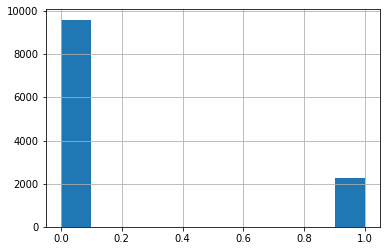

In [85]:
train[train['rejected_product_empty']].bin_target.hist()

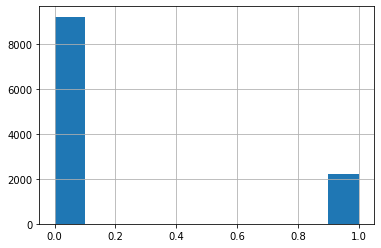

In [86]:
train[train['accepted_product_empty']].bin_target.hist()